# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [7]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-szRelXbv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szRelXbv/mcEcc_ct-szRelXbv_p0_s2_2016-11-29_1712
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szRelXbv/mcEcc_ct-szRelXbv_p0_s3_2016-11-29_1717
(192, 43)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', u'fovFade', u'periGap', u'periFade', u'szRelL', u'szRelR',
       u'offX', u'offY', u'trialT', u'nFrames', u'nNa', u'nf000', u'nf090',
       u'nf180', u'nf270', u'pd000', u'pd090', u'pd180', u'pd270', u'qnResp',
       u'ringSz'],
      dtype='object')


Transforming the data set first.

In [8]:
ds['stimSzL'] = np.round((ds.periGap*ds.szRelL*2+32)/35,1)
ds['stimSzR'] = np.round((ds.periGap*ds.szRelR*2+32)/35,1)
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
#ds['ringSzPL'] = np.round(ds.ringSzDeg/ds.stimSzL,2)
#ds['ringSzPR'] = np.round(ds.ringSzDeg/ds.stimSzL,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

             expName             time  participant  session  trialN  dirL  \
0  mcEcc_ct-szRelXbv  2016-11-29_1712            0        2       1     0   
1  mcEcc_ct-szRelXbv  2016-11-29_1712            0        2       2     0   
2  mcEcc_ct-szRelXbv  2016-11-29_1712            0        2       3     0   
3  mcEcc_ct-szRelXbv  2016-11-29_1712            0        2       4     0   
4  mcEcc_ct-szRelXbv  2016-11-29_1712            0        2       5     0   

   dirR  vL  vR  szL    ...     nf270  pd000  pd090  pd180    pd270  qnResp  \
0     0   0   0  256    ...         1      0    0.0    0.0  0.02381       0   
1     0   0   0  256    ...         1      0    0.0    0.0  0.02381       0   
2     0   0   0  256    ...         1      0    0.0    0.0  0.02381       0   
3     0   0   0  256    ...         1      0    0.0    0.0  0.02381       0   
4     0   0   0  256    ...         1      0    0.0    0.0  0.02381       0   

   ringSz  stimSzL  stimSzR ringSzDeg  
0     153      6.4    

## Visualization

In [9]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0  133  0.692708  0.462578   192
Fast (left):
   participant  sum      mean       std  size
0            0    1  0.005208  0.072169   192
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   58  0.302083  0.460362   192


### Proportion slow/fast/patchy trials

(-0.1, 1.1)

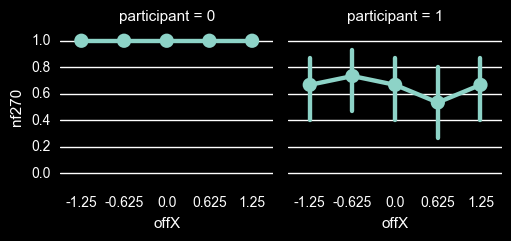

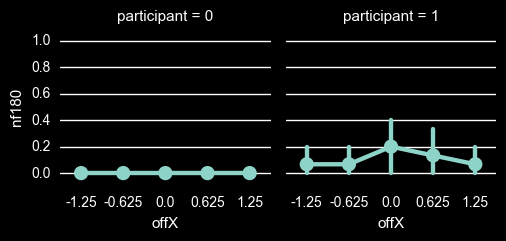

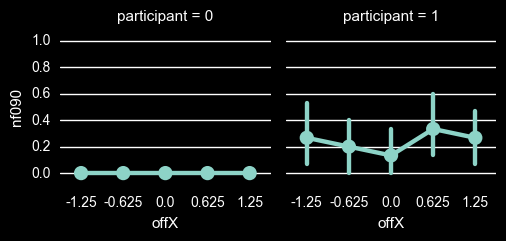

In [18]:
g = sns.factorplot(x='offX', y='nf270', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='offX', y='nf180', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='offX', y='nf090', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

### Stimulus size for slow/fast/patchy trials

(-0.1, 1.1)

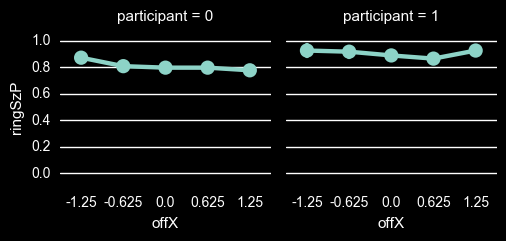

In [19]:
g = sns.factorplot(x='offX', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf270==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
#g = sns.factorplot(x='offX', y='ringSzP', col='participant', col_wrap=3,
                   #data=ds[ds.nf180==1], ci=95, dodge=.0, size=2.5)
#plt.ylim(-0.1,1.1)
#g = sns.factorplot(x='offX', y='ringSzP', col='participant', col_wrap=3,
                   #data=ds[ds.nf090==1], ci=95, dodge=.0, size=2.5)
#plt.ylim(-0.1,1.1)